In [4]:
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

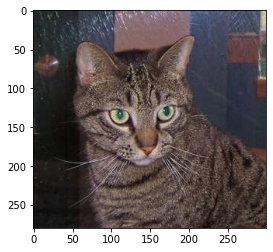

In [5]:
cat1=cv2.imread('../input/cat-and-dog/training_set/training_set/cats/cat.1.jpg')
cat1=cv2.cvtColor(cat1,cv2.COLOR_BGR2RGB)
plt.imshow(cat1)

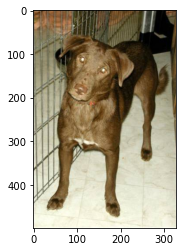

In [6]:
dog1=cv2.imread('../input/cat-and-dog/training_set/training_set/dogs/dog.1.jpg')
dog1=cv2.cvtColor(dog1,cv2.COLOR_BGR2RGB)
plt.imshow(dog1)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
image_gen=ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'                             
)

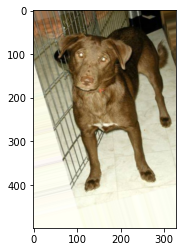

In [9]:
plt.imshow(image_gen.random_transform(dog1))

In [11]:
image_gen.flow_from_directory('../input/cat-and-dog/training_set/training_set')

Found 8005 images belonging to 2 classes.


In [30]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))



In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [23]:
image_shape = (150,150,3)
batch_size=16
train_image_gen=image_gen.flow_from_directory('../input/cat-and-dog/training_set/training_set',
                              target_size=image_shape[:2],
                             batch_size=batch_size,
                             class_mode='binary')

Found 8005 images belonging to 2 classes.


In [24]:
test_image_gen=image_gen.flow_from_directory('../input/cat-and-dog/test_set/test_set',
                              target_size=image_shape[:2],
                             batch_size=batch_size,
                             class_mode='binary')

Found 2023 images belonging to 2 classes.


In [36]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [38]:
model.fit_generator(train_image_gen,epochs=100,validation_data=(test_image_gen),
                   steps_per_epoch=150,
                   validation_steps=12)

Epoch 1/100
150/150 [==============================] - 61s 405ms/step - loss: 0.6856 - accuracy: 0.5533 - val_loss: 0.6777 - val_accuracy: 0.5729
Epoch 2/100
150/150 [==============================] - 59s 395ms/step - loss: 0.6877 - accuracy: 0.5696 - val_loss: 0.6905 - val_accuracy: 0.5260
Epoch 3/100
150/150 [==============================] - 58s 387ms/step - loss: 0.6899 - accuracy: 0.5558 - val_loss: 0.6748 - val_accuracy: 0.5833
Epoch 4/100
150/150 [==============================] - 58s 385ms/step - loss: 0.6853 - accuracy: 0.5601 - val_loss: 0.6699 - val_accuracy: 0.5781
Epoch 5/100
150/150 [==============================] - 58s 383ms/step - loss: 0.6799 - accuracy: 0.5802 - val_loss: 0.6736 - val_accuracy: 0.5417
Epoch 6/100
150/150 [==============================] - 58s 384ms/step - loss: 0.6788 - accuracy: 0.5750 - val_loss: 0.6647 - val_accuracy: 0.5521
Epoch 7/100
150/150 [==============================] - 58s 384ms/step - loss: 0.6733 - accuracy: 0.5879 - val_loss: 0.6588 -

Epoch 57/100
150/150 [==============================] - 57s 377ms/step - loss: 0.4628 - accuracy: 0.7729 - val_loss: 0.4312 - val_accuracy: 0.7969
Epoch 58/100
150/150 [==============================] - 70s 464ms/step - loss: 0.4661 - accuracy: 0.7779 - val_loss: 0.4392 - val_accuracy: 0.8073
Epoch 59/100
150/150 [==============================] - 57s 377ms/step - loss: 0.4561 - accuracy: 0.7812 - val_loss: 0.5044 - val_accuracy: 0.7604
Epoch 60/100
150/150 [==============================] - 56s 376ms/step - loss: 0.4776 - accuracy: 0.7756 - val_loss: 0.4689 - val_accuracy: 0.7708
Epoch 61/100
150/150 [==============================] - 56s 374ms/step - loss: 0.4491 - accuracy: 0.7858 - val_loss: 0.4319 - val_accuracy: 0.8125
Epoch 62/100
150/150 [==============================] - 57s 376ms/step - loss: 0.4661 - accuracy: 0.7837 - val_loss: 0.3953 - val_accuracy: 0.8229
Epoch 63/100
150/150 [==============================] - 57s 378ms/step - loss: 0.4503 - accuracy: 0.7941 - val_loss: 0

In [45]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.685585,0.553333,0.677676,0.572917
1,0.687738,0.569583,0.690483,0.526042
2,0.689889,0.555833,0.674846,0.583333
3,0.685291,0.560067,0.669914,0.578125
4,0.679946,0.580159,0.673633,0.541667


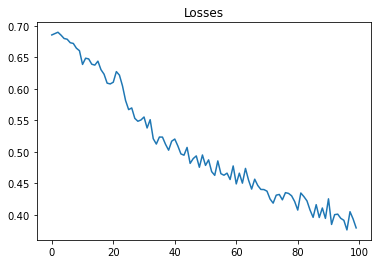

In [47]:
plt.plot(loss_df['loss'])
plt.title('Losses')
plt.show()

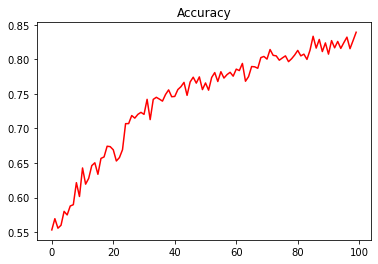

In [49]:
plt.plot(loss_df['accuracy'],color='red')
plt.title('Accuracy')
plt.show()

In [51]:
predictions=model.predict_classes(test_image_gen)
y_test=test_image_gen.classes

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52      1011
           1       0.49      0.43      0.46      1012

    accuracy                           0.49      2023
   macro avg       0.49      0.49      0.49      2023
weighted avg       0.49      0.49      0.49      2023



In [54]:
print(accuracy_score(y_test,predictions))

0.48788927335640137


In [55]:
print(confusion_matrix(y_test,predictions))

[[554 457]
 [579 433]]
